In [1]:
# import dependencies

import pandas as pd
import os

In [2]:
# import dataframe of crime types

crime_type_file = os.path.join('..', 'Data', 'Offense_Category_Type_2020.csv')
crime_type_df = pd.read_csv(crime_type_file)
crime_type_df.head()

,Offense_Category,Offense_Type
0,Assault,Person
1,Homicide,Person
2,Human Trafficking,Person
3,Kidnapping_Abduction,Person
4,Sex,Person


In [3]:
# import dataframe of crime stats

crime_file = os.path.join('..', 'Data', 'Crime_Offense_Category_by_State_2020.csv')
crime_df = pd.read_csv(crime_file)

# add a column of 'Offense_Type'

for i in range(len(crime_df)):
    for j in range(len(crime_type_df)):
        if crime_df.loc[i, 'Offense_Category'] == crime_type_df.loc[j, 'Offense_Category']:
            crime_df.loc[i, 'Offense_Type'] = crime_type_df.loc[j, 'Offense_Type']

crime_df.head()

,State,Offense_Category,Volume,Offense_Type
0,Alabama,Assault,4214,Person
1,Alabama,Homicide,24,Person
2,Alabama,Human Trafficking,0,Person
3,Alabama,Kidnapping_Abduction,52,Person
4,Alabama,Sex,94,Person


In [4]:
crime_df.isna().sum()

State               0
Offense_Category    0
Volume              0
Offense_Type        0
dtype: int64

In [5]:
# group  dataframe by 'Offense_Type' and 'State'

crime_grouped_df = crime_df.groupby(['State', 'Offense_Type']).sum()
crime_grouped_df.head()

Volume
State   Offense_Type        
Alabama Person          4384
        Property        7981
        Society         3235
Arizona Person         18440
        Property       47284

In [6]:
# group dataframe by 'State'
crime_state_df = crime_df.groupby(['State']).sum()
crime_state_df.head()

,Volume
State,
Alabama,15600
Arizona,83963
Arkansas,235122
Colorado,353126
Connecticut,116810


In [17]:
# import dataframe of law enforcement

law_enforcement_file = os.path.join('..', 'Data', 'Law_Enforcement_Employees_State_2020.csv')
law_enforcement_df = pd.read_csv(law_enforcement_file)
law_enforcement_df.head()

,State,Total_law_ employees,male_officers,female_officers,male_civilians,female_civilians,Num_Agencies,Est_pop
0,Alabama,17985,11203,1014,2003,3765,387,4851203
1,Alaska,2002,1170,120,265,447,37,730400
2,Arizona,22526,11308,1450,4485,5283,110,7359580
3,Arkansas,10442,6087,724,1375,2256,288,3011972
4,California,120756,68774,10862,15350,25770,460,33781093


In [21]:
# add a new column for the ratio of law enforcement to population

law_enforcement_df['law_to_pop_ratio'] = law_enforcement_df['Total_law_ employees'] / law_enforcement_df['Est_pop']
law_enforcement_df.head()

,State,Total_law_ employees,male_officers,female_officers,male_civilians,female_civilians,Num_Agencies,Est_pop,law_to_pop_ratio
0,Alabama,17985,11203,1014,2003,3765,387,4851203,0.003707
1,Alaska,2002,1170,120,265,447,37,730400,0.002741
2,Arizona,22526,11308,1450,4485,5283,110,7359580,0.003061
3,Arkansas,10442,6087,724,1375,2256,288,3011972,0.003467
4,California,120756,68774,10862,15350,25770,460,33781093,0.003575


In [33]:
# merge with the crime table 

df = crime_state_df.merge(law_enforcement_df, how='inner', left_on='State', right_on='State')#[['State', 'Volume', 'law_to_pop_ratio']]
df.head()

,State,Volume,Total_law_ employees,male_officers,female_officers,male_civilians,female_civilians,Num_Agencies,Est_pop,law_to_pop_ratio
0,Alabama,15600,17985,11203,1014,2003,3765,387,4851203,0.003707
1,Arizona,83963,22526,11308,1450,4485,5283,110,7359580,0.003061
2,Arkansas,235122,10442,6087,724,1375,2256,288,3011972,0.003467
3,Colorado,353126,18853,10801,1885,2260,3907,237,5753378,0.003277
4,Connecticut,116810,9163,6814,892,595,862,107,3557006,0.002576


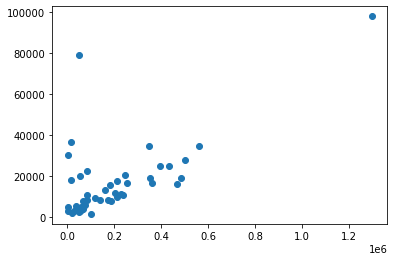

In [35]:
# visualize the data

import matplotlib.pyplot as plt
plt.scatter(df['Volume'], df['Total_law_ employees'])
plt.show()

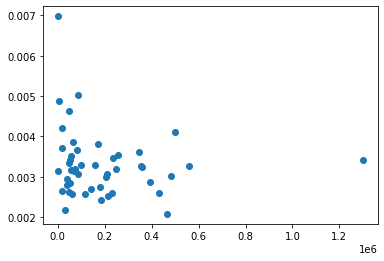

In [36]:
# visualize the data

import matplotlib.pyplot as plt
plt.scatter(df['Volume'], df['law_to_pop_ratio'])
plt.show()